<a href="https://colab.research.google.com/github/orgento7/177/blob/master/%22Final_work_Git_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В рамках борьбы с курением в неположенном месте.
Предлагаю обученную модель  которая  в режиме реального времени, при интеграции в систему видеонаблюдения сможет анализировать видео с камер, обнаруживая на нём людей курящих в неположенном месте.
В процессе обучения модели с использованием DarkNet YOLOv4 столкнулся с низкой скоростью обучения, модель из 4600 фотографий обучалась на бесплатном тарифе Colab около 15 часов блоками по 3 часа в сутки. И точность составила 75%. Поэтому вторым вариантом предлагаю обученную модель YOLOv5, и Roboflow. Если в первом варианте я использовал из Roboflow подготовленный набор данных вручную, то во втором варианте использовал  Roboflow для автоматической маркировки, подготовки и размещения пользовательских данных в формате YOLOv5. В итоге обучение на GPU в Colab составило 1.5 часа при точности модели 75% 





In [ ]:
# Подключение к Google диску
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Создание символической ссылки с более коротким именем.
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
# Клонирую репозиторий darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.14 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [ ]:
#Вношу необходимые изменения в файл makefile
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# Запускаем утилиту make
!make

In [ ]:
# Запускаем утилиту make
!make
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# Существует множество различных предварительно подготовленных весов. В нашем случае в данных будут маленькие  объекты, и официальное репозиторий советует использовать yolov4.conv.137 для инициализации.
!cp /mydrive/YOLOv4Files/Dataset.zip ../

Добовляю мною собранную и подготовленную модель Roboflow состоящуюиз 4600 картинок.

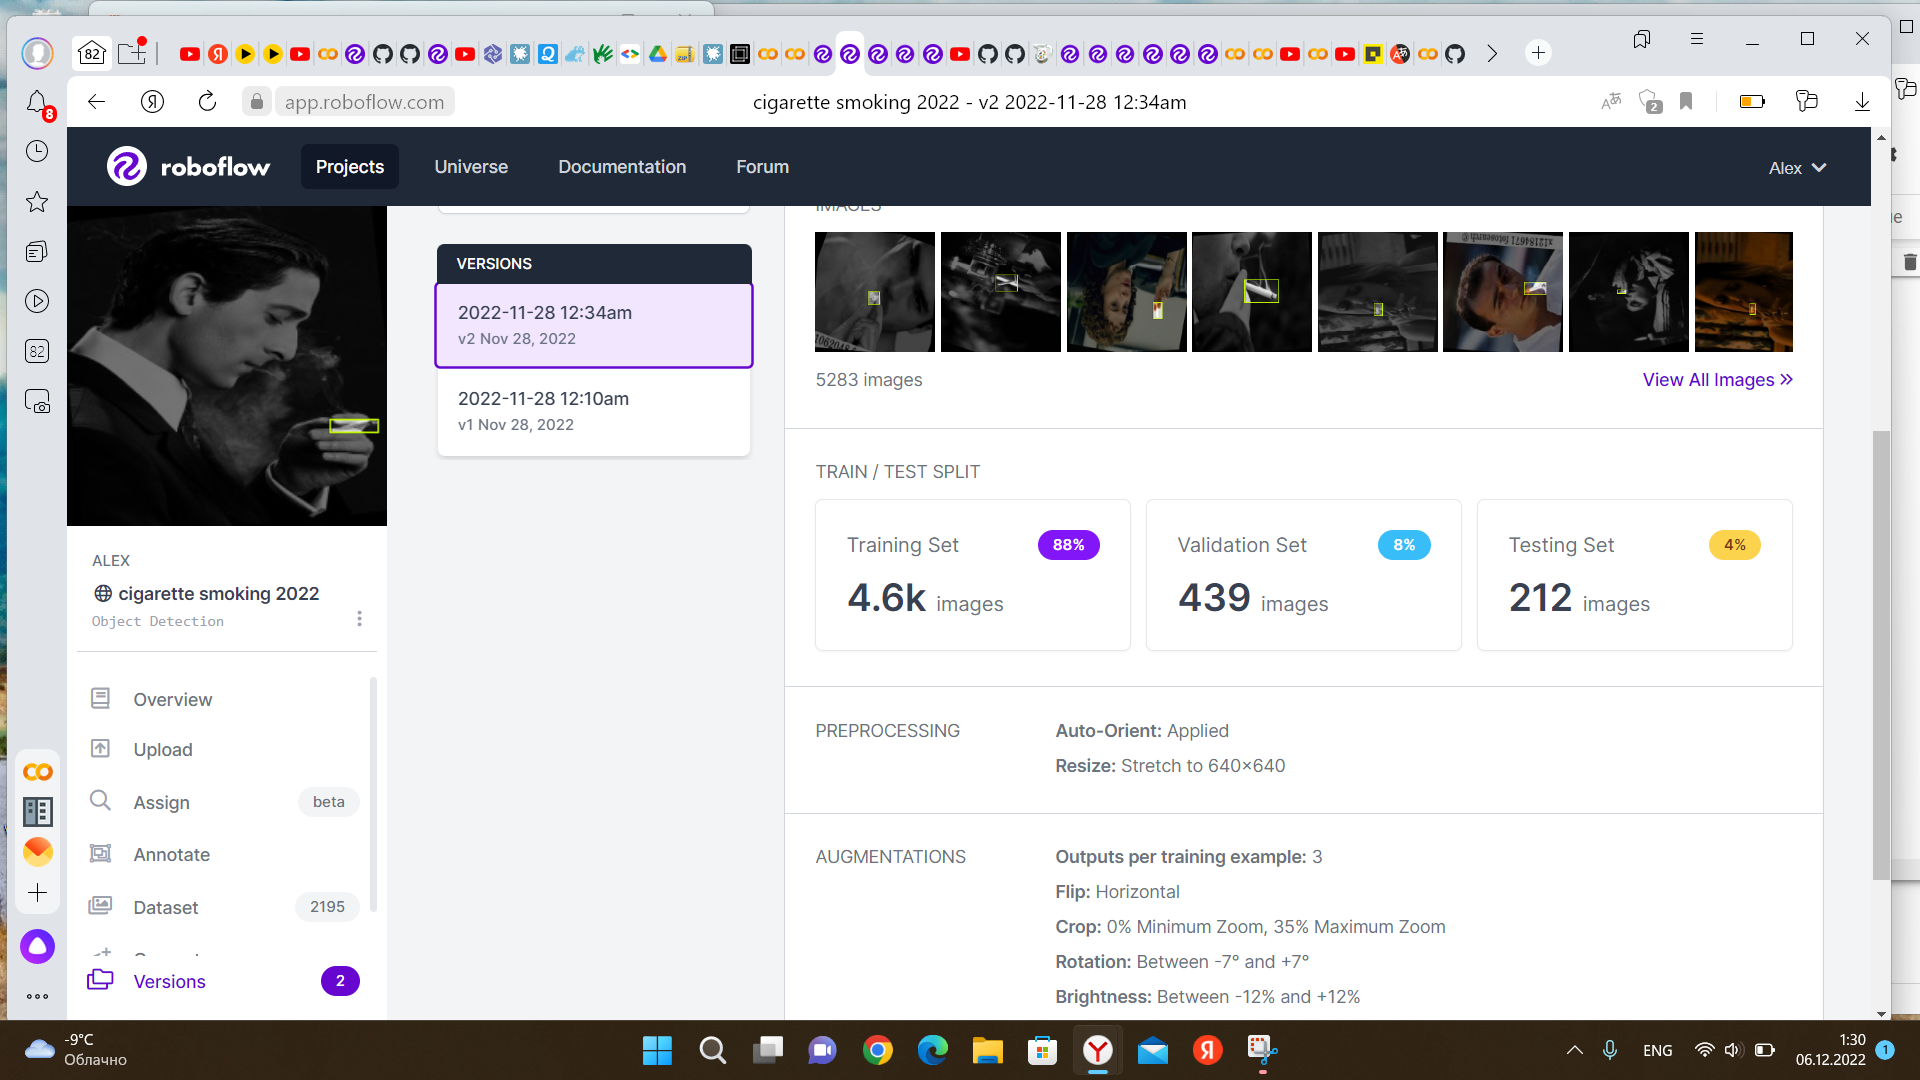

In [ ]:
!unzip ../Dataset.zip -d data/

In [ ]:
# Прописываю пути к файлам с описанием набораданных
def add_txt_files_with_names_of_images(split = "train"):
  import os
  image_files = []
  os.chdir(os.path.join("data", split))
  for filename in os.listdir(os.getcwd()):
      if filename.endswith(".jpg"):
          image_files.append(f"data/{split}/" + filename)
  os.chdir("..")
  with open(f"{split}.txt", "w") as outfile:
      for image in image_files:
          outfile.write(image)
          outfile.write("\n")
      outfile.close()
  os.chdir("..")

In [ ]:
for split in ["train", "valid"]:
  add_txt_files_with_names_of_images(split)

In [ ]:
!ls data/

9k.tree      goal.txt		       person.jpg	    train.txt
coco9k.map   horses.jpg		       README.dataset.txt   valid
coco.names   imagenet.labels.list      README.roboflow.txt  valid.txt
dog.jpg      imagenet.shortnames.list  scream.jpg	    voc.names
eagle.jpg    labels		       test
giraffe.jpg  openimages.names	       train


In [ ]:
# Изменяю конфигурацию файла в соответствии с требования обучаемой модели cfg/yolov4-custom.cfg и копируем созданные файлы
#!cp cfg/yolov4-custom.cfg /mydrive/YOLOv4Files/yolov4-obj.cfg 

In [ ]:
!cp /mydrive/YOLOv4Files/yolov4-obj.cfg cfg/yolov4-obj.cfg 

In [ ]:
!cp /mydrive/YOLOv4Files/obj.names ./data

In [ ]:
!cp /mydrive/YOLOv4Files/obj.data  ./data

In [ ]:
# Тренируем модель 
#!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# При сбое обучения всегда можно продолжить с этого места
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/YOLOv4Files/backup/yolov4-obj_last.weights -dont_show -map

In [ ]:
# Показатели модели
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/YOLOv4Files/backup/yolov4-obj_final.weights

In [ ]:
# Изменяем настройки для обработки демонстрационного видео файла
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
!sed -i 's/width=416/width=608/' yolov4-obj.cfg
!sed -i 's/height=416/height=608/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# Обработка ролика
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /mydrive/YOLOv4Files/backup/yolov4-obj_best.weights -dont_show /mydrive/YOLOv4Files/test_video.mp4 -i 0 -out_filename /mydrive/YOLOv4Files/yolo4resultstuned.avi -out result.json -thresh 0.4

Демонстрационное видео YOLOv4

https://drive.google.com/file/d/1-0VZw2JhUI4j6u5K8MRYBuDm90mNeD9X/view?usp=sharing

Ссылка на Colab c обученной моделью YOLOv5 + Roboflow(Оставил черновой вариант может какие ссылки будут полезны)

https://colab.research.google.com/drive/18vw7hY3XAinJ0ZW3X-OJO5uK21Hn5e6z?usp=sharing

Демонстрационное видео YOLOv5 + Roboflow

https://drive.google.com/file/d/1GuMZuV7B4SahnIGr-ghwewdwSfnIkXV7/view?usp=share_link